In [6]:
###################################################################################################################
# 1st assignment - Introduction to AI.                                                                            #
# OsloMet Fall 2021.                                                                                              #
# Lars Harila, s171969.                                                                                           #
#                                                                                                                 #
# I have chosen six features from the data frame:                                                                 #
# -----------------------------------------------                                                                 #
# Tidspunkt_Faktisk_Ankomst_Holdeplass_Faa,                                                                       #
# Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,                                                                        #
# Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,                                                                      #
# Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,                                                                       #
# Kjøretøy_Kapasitet and                                                                                          #
# Passasjerer_Ombord.                                                                                             #
#                                                                                                                 #
# I have combined/manipulated these to try and find correlation between delays and how full the vehicles are.     #
# These new columns are then plotted for a graphical representation of the data.                                  #
###################################################################################################################

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Setting location of file.
url = "C:/Users/Jenkyball/Desktop/AI/Ruter_data.csv"

# Reading data from file into dataframe.
df = pd.read_csv(url, sep=';')

# Showing the first three rows.
df.head(3)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6


In [4]:
# Checking for empty cells. Does not look like there are any.
df.isna().sum()

TurId                                        0
Dato                                         0
Fylke                                        0
Område                                       0
Kommune                                      0
Holdeplass_Fra                               0
Holdeplass_Til                               0
Linjetype                                    0
Linjefylke                                   0
Linjenavn                                    0
Linjeretning                                 0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra     0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra      0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra    0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra     0
Kjøretøy_Kapasitet                           0
Passasjerer_Ombord                           0
dtype: int64

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,FakAnkDateTimeBruk,PlanAnkDateTimeBruk,Forsinkelse,ForsinkelseSekunder,LedigePlasser,ForsinkelseSekunderClip
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:00,10:53:00,112,5,2021-09-27 10:53:53,2021-09-27 10:53:00,0 days 00:00:53,53.0,107,53.0
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,13:12:00,13:12:00,112,5,2021-09-27 13:12:20,2021-09-27 13:12:00,0 days 00:00:20,20.0,107,20.0
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,10:19:00,10:19:00,112,6,2021-09-27 10:18:56,2021-09-27 10:19:00,-1 days +23:59:56,0.0,106,0.0
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,13:51:00,13:51:00,112,10,2021-09-27 13:52:04,2021-09-27 13:51:00,0 days 00:01:04,64.0,102,64.0
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,07:33:00,07:33:00,112,10,2021-09-27 07:34:13,2021-09-27 07:33:00,0 days 00:01:13,73.0,102,73.0


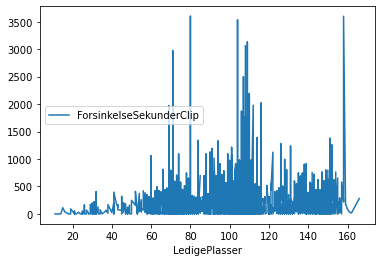

In [8]:
# Converting from datatype object to datatype Datetime. Using "errors='coerce'" to set invalid parsing to NaN.
df['FakAnkDateTimeBruk'] = pd.to_datetime(df.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra, errors='coerce')
df['PlanAnkDateTimeBruk'] = pd.to_datetime(df.Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra, errors='coerce')

# Making a new column for delay.
df['Forsinkelse'] = df['FakAnkDateTimeBruk'] - df['PlanAnkDateTimeBruk']
# Converting from Datetime to seconds.
df['ForsinkelseSekunder'] = df['Forsinkelse'].dt.total_seconds()

# Making a new column for availability.
df['LedigePlasser'] = df['Kjøretøy_Kapasitet'] - df['Passasjerer_Ombord']

# Negative values means that the bus/tram/metro arrived ahead of schedule. Using clip() to set these equal to 0.
df['ForsinkelseSekunder'] = df['ForsinkelseSekunder'].clip(lower=0)

# There are a few delays greater than 3600 secs = 1 hour. Setting these to one hour for readability.
df['ForsinkelseSekunderClip'] = df['ForsinkelseSekunder'].clip(upper=3600)

# Making a copy of the first dataframe, so we can sort without affecting the original frame.
df2 = df
# Sorting by availability.
df2 = df.sort_values(by=['LedigePlasser'])
# Plotting by sorted availability on x-axis, and delay in seconds on the y-axis.
df2.plot(x = 'LedigePlasser', y = 'ForsinkelseSekunderClip')

df.head()